In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from P3_helpers import *

In [2]:
# Load data
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time
104161,Jon Harald Søby,Rettetast,1,1.0,2007.0,2007-05-07 19:34:00,"'''Support''', great contributor.",1,20.950000
149984,Physicq210,Thatcher131,1,1.0,2006.0,2006-09-20 02:58:00,'''Support''' While in retrospect Rory096's co...,2,123.433333
66947,Alasdair,Sarcasticidealist,1,1.0,2008.0,2008-01-13 14:07:00,'''Support''' Modesty is an important attribut...,1,128.350000
152554,Rogerd,Yamla,1,1.0,2006.0,2006-01-13 02:07:00,'''Support''' good editor --,2,24.533333
152538,WillMak050389,Xyrael,0,1.0,2006.0,2006-08-27 02:42:00,'''Neutral''' A great editor with good contrib...,1,15.083333


# Evolution of votes proportions through time

In [3]:
df_vote_evolution = get_progressive_mean(df_vote_evolution)
df_vote_evolution.sample(5)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,progressive_mean
23541,Anthonyhcole,Looie496,1,1.0,2010.0,2010-10-07 08:04:00,"'''Support''' Unreservedly. Looie is modest, h...",1,3 days 02:37:59.999999998,1.000000
158325,Tariqabjotu,Eluchil404,-1,-1.0,2006.0,2006-07-21 13:02:00,'''Oppose''' per Tony Sidaway; not enough expe...,1,0 days 17:45:00,0.448276
14599,SuperMarioMan,Salvio giuliano,1,1.0,2011.0,2011-03-27 02:48:00,'''Support''' I've been aware of Salvio for so...,1,0 days 14:51:00,1.000000
114366,Trusilver,Diez2,0,-1.0,2007.0,2007-07-30 05:40:00,'''Neutral''' Changed position from oppose aft...,1,1 days 10:30:00,0.423077
83192,Balloonman,Tkgd2007,-1,-1.0,2008.0,2008-05-19 02:32:00,'''Oppose''' sorry need more experience---less...,1,0 days 01:25:00.000000001,-0.600000


In [4]:
# Moving average of the progressive mean by filtering the data with a window of 1 hour and computation of the median, first and last quartile
rolling_avg = df_vote_evolution.groupby(['Results', pd.Grouper(key='Voting_time', freq='1h', origin='start')]).progressive_mean

# Compute the median, first and last quartile
quartiles = rolling_avg.quantile([0.25, 0.5, 0.75]).unstack(level=2)
# Compute moving average of each column 
quartiles = rolling_average(quartiles)

# Compute the mean and 95% confidence interval
sem = rolling_avg.agg(['mean', stats.sem]).reset_index()
sem['lower'] = sem['mean'] - 1.96 * sem['sem']
sem['upper'] = sem['mean'] + 1.96 * sem['sem']
sem.rename(columns={'mean': 'center'}, inplace=True)
sem.Voting_time = time_to_float(sem.Voting_time)

# Display the results
display(quartiles.sample(5))
display(sem.sample(5))

,Results,Voting_time,lower,center,upper
102,-1.0,51.0,0.223093,0.678710,1.0
577,1.0,451.0,1.000000,1.000000,1.0
25,-1.0,12.0,0.058007,0.769925,1.0
265,1.0,132.0,1.000000,1.000000,1.0
611,1.0,545.0,1.000000,1.000000,1.0


,Results,Voting_time,center,sem,lower,upper
425,1.0,205.0,1.000000,0.000000,1.000000,1.000000
596,1.0,504.0,1.000000,0.000000,1.000000,1.000000
564,1.0,406.0,0.350000,NaN,NaN,NaN
277,1.0,57.0,0.981470,0.003107,0.975380,0.987559
343,1.0,123.0,0.973932,0.005173,0.963793,0.984072


KeyError: -1

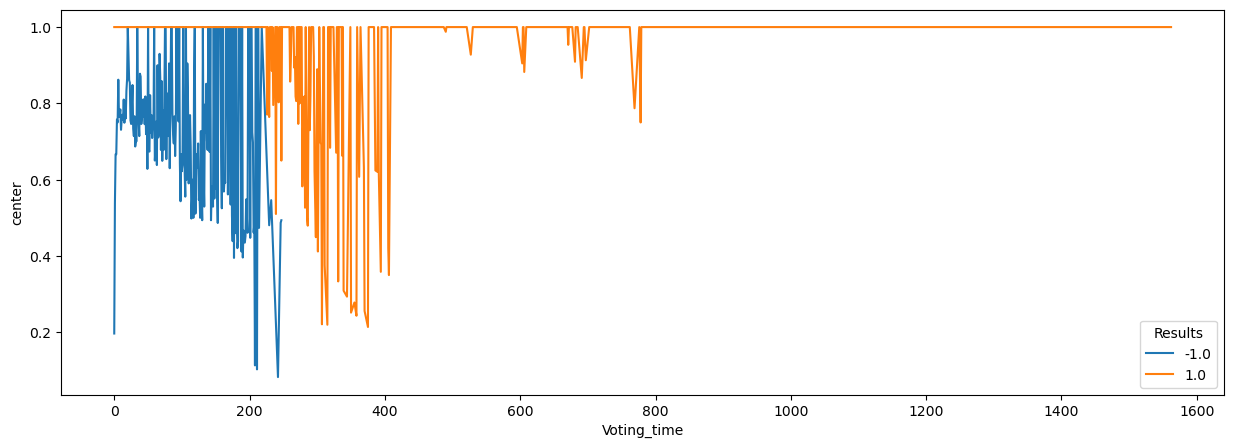

In [5]:
# Plot the evolution of the median, first and last quartile of the progressive mean
ax = plot_vote_evolution(quartiles)
ax.set_title('Evolution of the median, first and last quartile of the progressive mean')
plt.show()

# Plot the evolution of the mean and 95% confidence interval of the progressive mean
ax = plot_vote_evolution(sem)
ax.set_title('Evolution of the mean and 95% confidence interval of the progressive mean')
plt.show()
